In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fsolve

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

# The Lagrangian: Constrained Optimization

The Lagrangian form makes solving for these extrema straightforward. In order to solve for these conditional extrema, follow these steps:

1. Rewrite your function and constraint together in the Lagrangian form:

    $$
    L(x, y, h) = \nabla f(x, y) - \lambda (\nabla B(x, y) - b)
    $$

    where the constraint is rewritten as:

    $$
    B(x, y) = b
    $$

2. Set $ \nabla L(x, y, h) = 0 $ and solve for $ x $, $ y $, and $ \lambda $:

3. Plug the solutions for $ x $, $ y $, and $ \lambda $ into $ f(x, y) $ and find the maximum.

Say you have a function $ f(x, y) $ and you want to find its extrema subject to some condition. 

For instance:

$$
f(x, y) = x^2 y
$$

subject to the condition that

$$
x^2 + y^2 = 1
$$

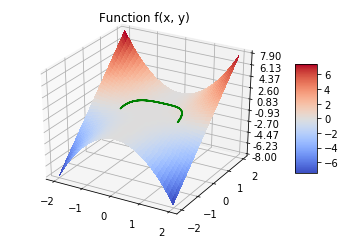

In [38]:
X = np.arange(-2, 2, 0.025)
Y = np.arange(-2, 2, 0.025)

f = lambda x, y : x**2 * y

Xm, Ym = np.meshgrid(X, Y)
Z = f(Xm, Ym)
xc = np.cos(np.arange(0, 2 * np.pi, 0.025))
yc = np.sin(np.arange(0, 2 * np.pi, 0.025))

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot(xc, yc, zs=f(xc, yc), c='g')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Function f(x, y)')

plt.show()

In the Lagrangian form, our function becomes:

$$
L(x, y, h) = \left[ \begin{array}{c} 2xy \\ x^2 \end{array} \right]
             - \lambda \left( \left[ \begin{array}{c} 2x \\ 2y \end{array} \right] - 1 \right)
$$

giving us the following system of equations:

$$
L_x(x, y, \lambda) = 2xy - \lambda(2x - 1) = 0 \\
L_y(x, y, \lambda) = x^2 - \lambda(2y - 1) = 0 \\
L_\lambda(x, y, \lambda) = x^2 + y^2 - 1 = 0
$$

In [30]:
l = lambda x : (2 * x[0] * x[1] - x[2] * (2 * x[0] - 1), \
                x[0]**2 - x[2] * (2 * x[1] - 1), \
                x[0]**2 + x[1]**2 - 1)
xo, yo, lo = fsolve(l, (1, 1, 1))

print('The roots of f(x, y) are (xo: {}, yo: {}, zo: {})'.format(xo, xo, lo))
print('The value of f(x, y) at this point is: {}'.format(f(xo, yo)))

The roots of f(x, y) are (xo: 0.75905760297, yo: 0.75905760297, zo: 1.90754607135)
The value of f(x, y) at this point is: 0.375099178746
